# Monte Carlo simulation of a Harmonic Oscillator system at NVT

## Initializations

Imports:

In [7]:
%matplotlib inline
#%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import pint
import matplotlib.pyplot as plt
import numpy as np

Standard Units:

In [8]:
rng = np.random.default_rng()
ureg = pint.UnitRegistry(auto_reduce_dimensions=True)
ureg.setup_matplotlib()
meter = ureg.meter
second = ureg.second
kilo = ureg.kilogram
Kel = ureg.kelvin
joule = ureg.joule

Global Constants:

In [97]:
#system constants
k = 1 * kilo/second**2
m = 1 * kilo #actually in amu
kb = 3.166811e-6 * kilo * meter**2 / second**2 / Kel #actually kb/n where n is the conversion factor between amu and kg

#simulation conditions
dx = 0.05 * meter
cycles = 100000
Pi = 0 * meter
Tf = 300 * Kel
nbins = 15

## Definitions

In [10]:
#returns potential energy from position
def potentialE(pos):
    PE = k / 2 * pos**2
    return PE

## Simulations

Metropolis Algorithm Monte Carlo Simulation:

In [98]:
#Initialize the variables that will store the data
cpos = Pi
Pos = np.zeros(1) * meter
Pos[0] = Pi
eni = potentialE(cpos)

#MC loop
for i in range(cycles):
    #calculate new position and energy
    npos = cpos + (rng.uniform(-0.5,0.5) * dx)
    enf = potentialE(npos)
    #print(enf)
    #decide to keep the new position or not
    if rng.random() < np.exp(-1 / kb / Tf * (enf - eni)):
        eni = enf
        cpos = npos
    Pos = np.append(Pos, cpos)

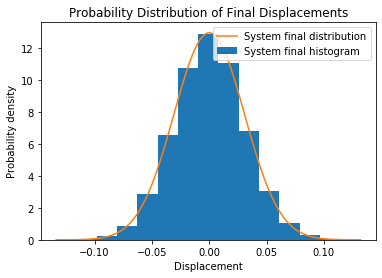

In [99]:
ps = np.linspace(np.amin(Pos), np.amax(Pos), 100)

fig, aa = plt.subplots()
aa.hist(Pos, bins=nbins, density=True, label='System final histogram')
aa.plot(ps, (1 / 2 / np.pi)**0.5 / np.std(Pos) * np.exp(-1 / 2 * ps**2 / np.std(Pos)**2), label='System final distribution')

plt.setp(aa, xlabel='Displacement', ylabel='Probability density')
aa.set_title('Probability Distribution of Final Displacements')
aa.legend()